# Digit Recognizer

## Download datasets from Kaggle

In [1]:
# To Make sure latest version of keras is installed
!pip install -q -U keras-tuner

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf. __version__)

2.0.0


In [3]:
from tensorflow.keras.utils import to_categorical

In [2]:
test_model = keras.models.load_model('digit_recognistion_cnn_model.h5')

In [1]:
# Imports 
import pandas as pd 
import numpy as np 
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import keras_preprocessing
from keras_preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

# for Tunning hyperparameter 

import keras_tuner as kt


In [6]:
# Install kaggle 
!pip install -q kaggle
# Upload kaggle.json dowloaded from API section from kaggle
#from google.colab import files
#files.upload()
# create a kaggle directory/folder
! mkdir ~/.kaggle
# copy the kaggle.json to folder created 
! cp kaggle.json ~/.kaggle/
# permision for the json to act 
! chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# download the data 
!kaggle competitions download -c digit-recognizer

In [7]:
# Extract the  Zip files 
!unzip train.csv.zip
!unzip test.csv.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


## Loading Data 

In [5]:
# load the trainng and test images 
training_imgs = pd.read_csv('train.csv')
final_test_imgs = pd.read_csv('test.csv')

In [6]:
final_test_imgs

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploring data

In [10]:
training_imgs.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
training_imgs.shape

In [ ]:
final_test_imgs.shape

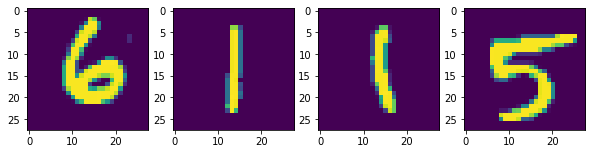

In [7]:
# pick up random sample from the training  and show display the image 
%matplotlib inline

fig,axis = plt.subplots(1,4,figsize=(10,10))
for i in range(4):
  sample_index = np.random.randint(0,training_imgs.shape[0]-1)
  sample_img = training_imgs.iloc[sample_index,1:].values.reshape((28,28))
  axis[i].imshow(sample_img)



In [ ]:
# check the class distribution 
training_imgs.iloc[:,0].value_counts()

## Train Test split

In [8]:
X = training_imgs.iloc[:,1:]
Y = training_imgs.iloc[:,0]

# convert Label to categorical 
Y= to_categorical(Y)

# Normalise the data 
X = X/255.
final_test_imgs = final_test_imgs/255.

In [9]:
# Train test split 

X_train,X_test,y_train,y_test =train_test_split(X,Y,random_state=42)

In [8]:
y_test.shape

(10500, 10)

In [7]:
y_train.shape

(31500, 10)

## Model Building 

### Neural Network Hyper parameter Tunning 

In [ ]:
# Hyper parameters 
# 1. learning rate 
# 2. No of layers 
# 3. No of units in each layer 
# 4. beta for Expoential momentum 
# 5. beta for RMS prop
# 6. beta1 and beta2 for adam 
# 7 batch and epoch 
# 8 optimization algos 
# 9 activation function 
# weight initalization

#### Basic Tunning : units and lr

In [15]:
# Fresh Train test split 
X_train,X_test,y_train,y_test,final_test_imgs_cnn = cnn_train_test_split()

In [16]:
# hyper model 
def model_builder(hp):
  model = keras.Sequential()
  # add Flatten layer 
  model.add(keras.layers.Flatten(input_shape =(28,28,1))) #

  # Tune the number of units in the first Dense layer
  # choosing optimal value between 32 and 512
  hp_units = hp.Int('units',min_value =32,max_value =512, step =32)
  model.add(keras.layers.Dense(units = hp_units,activation ='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))

  # Tune learning rate for optimizer 
  # choose an optimal value from 0.01, 0.01, 0.0001
  hp_learning_rate =hp.Choice('learning_rate',values =[1e-2,1e-3,1e-4])

  # compile the model
  model.compile(optimizer =keras.optimizers.Adam(learning_rate =hp_learning_rate),
                loss ='categorical_crossentropy',
                metrics =['accuracy'])
  return model


In [17]:
# build the tunner 
tunner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials =5,
    directory ='my_dir',
    project_name='hp_tunning'

)

INFO:tensorflow:Reloading Oracle from existing project my_dir\hp_tunning\oracle.json


In [18]:
tunner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [19]:
# search for hyper parameters
tunner.search(X_train,y_train,
              epochs=5,
              validation_data =(X_test,y_test))

Trial 1 Complete [00h 01m 11s]
val_accuracy: 0.9572380781173706

Best val_accuracy So Far: 0.9572380781173706
Total elapsed time: 00h 01m 11s

Search: Running Trial #2

Hyperparameter    |Value             |Best Value So Far 
units             |256               |416               
learning_rate     |0.0001            |0.01              

Train on 31500 samples, validate on 10500 samples
Epoch 1/5
31500/31500 [==============================] - 13s 424us/sample - loss: 0.7046 - accuracy: 0.8286 - val_loss: 0.3675 - val_accuracy: 0.9026
Epoch 2/5
22560/31500 [====================>.........] - ETA: 3s - loss: 0.3253 - accuracy: 0.9133WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


KeyboardInterrupt: 

In [ ]:
tunner.results_summary()

In [ ]:
# Get the optimal hyperparameters
best_hps=tunner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

#### Tunning for Layers 

In [ ]:
# Finding optimum layers 
def model_builder2(hp):
  model = keras.Sequential()
  # add Flatten layer 
  model.add(keras.layers.Flatten(input_shape =(28,28)))

  # Tune the number of units in the first Dense layer
  # choosing optimal value between 32 and 512
  #hp_units = hp.Int('units',min_value =50,max_value =100, step =10)
  for i in range(hp.Int('layers',2,6)):

    model.add(keras.layers.Dense(
        units = hp.Int('units_' +str(i),32,512,step=64),
        activation='relu'))
        #activation = hp.Choice('act_'+str(i),['relu','sigmoid']))))
  model.add(keras.layers.Dense(10, activation='softmax'))

  # Tune learning rate for optimizer 
  # choose an optimal value from 0.01, 0.01, 0.0001
  #hp_learning_rate =hp.Choice('learning_rate',values =[1e-2,1e-3,1e-4])

  # compile the model
  model.compile(optimizer ='adam',
                loss ='categorical_crossentropy',
                metrics =['accuracy'])
  return model

In [ ]:
tuner_2 = kt.RandomSearch(
    model_builder2,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir_3',
    project_name='tunning_3'
)

In [ ]:
tuner_2.search_space_summary()

In [ ]:
tuner_2.search(X_train,y_train,
               epochs=10,
               validation_data=(X_test,y_test))

In [ ]:
tuner_2.results_summary()

In [ ]:
best_nn_model = tuner_2.get_best_models(num_models=1)[0]
best_nn_model.summary()

#### Generate submission file

In [ ]:
## predicting final test images 
generate_submission(best_nn_model.predict(final_test_imgs),'sumbmission_tunned_nn_model')

### Simple ANN : without Tunning

In [ ]:
### Neural Networks 

nn_model = tf.keras.Sequential([
                             tf.keras.layers.Dense(784,activation='relu',input_shape=(784,)),
                             tf.keras.layers.Dense(10,activation='relu'),
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(10,activation='softmax')

])

In [ ]:
nn_model.summary()

In [ ]:
nn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'],)

In [ ]:
history = nn_model.fit(X_train,y_train,
                    epochs =10,
                    batch_size =50,
                    validation_data=(X_test,y_test),
                    verbose=1)

In [ ]:
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

In [ ]:
## prediction on test data 
y_predict = nn_model.predict(final_test_imgs)
y_predict_classes = np.argmax(y_predict,axis =1)
results = pd.DataFrame(y_predict_classes,columns=['Label'])
results['ImageID']= pd.Series(range(1,28001))
results =results.loc[:,['ImageID','Label']]

In [ ]:
results

In [ ]:
results.to_csv('nn_submision1.csv',index =False)

In [72]:
def generate_submission(model_predictions,submission_name):
  y_predict = model_predictions.copy()
  y_predict_classes = np.argmax(y_predict,axis =1)
  results = pd.DataFrame(y_predict_classes,columns=['Label'])
  results['ImageID']= pd.Series(range(1,28001))
  results =results.loc[:,['ImageID','Label']]

  # generate the csv file 
  results.to_csv(submission_name +'.csv',index =False)

In [ ]:
generate_submission(nn_model.predict(final_test_imgs),'test_submission')


### Simple CNN : without Tunning

In [ ]:
# # Train test split 

X_train,X_test,y_train,y_test =train_test_split(X,Y,random_state=42)
# Reshape the training and test to fit the input format of CNN
# shape of image is 28X28X1
# shape of X_train (m,img_height,img_width,channels)

X_train = X_train.values.reshape(-1,28,28,1)
X_test =X_test.values.reshape(-1,28,28,1)

final_test_imgs_cnn =final_test_imgs.values.reshape(-1,28,28,1)




In [ ]:
def cnn_train_test_split():
  # load the data
  training_imgs = pd.read_csv('train.csv')
  final_test_imgs = pd.read_csv('test.csv')

  # Seperate labels 
  X = training_imgs.iloc[:,1:]
  Y = training_imgs.iloc[:,0]

  # convert Label to categorical 
  Y= to_categorical(Y)

  # Normalise the data 
  X = X/255.
  final_test_imgs = final_test_imgs/255.

  # # Train test split 
  X_train,X_test,y_train,y_test =train_test_split(X,Y,random_state=42)
  # Reshape the training and test to fit the input format of CNN
  # shape of image is 28X28X1
  # shape of X_train (m,img_height,img_width,channels)

  X_train = X_train.values.reshape(-1,28,28,1)
  X_test =X_test.values.reshape(-1,28,28,1)

  final_test_imgs_cnn =final_test_imgs.values.reshape(-1,28,28,1)

  return X_train,X_test,y_train,y_test,final_test_imgs_cnn


In [ ]:
final_test_imgs

In [ ]:
final_test_imgs_cnn.shape

In [ ]:
X_test.shape

In [ ]:
epochs =10
batch_size =80

# setup Image Data generator 
training_datagen = ImageDataGenerator(
    #rotation_range=10,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,

)
#
validation_datagen = ImageDataGenerator()

training_generator = training_datagen.flow(X_train,y_train,batch_size=batch_size)
validation_generator = validation_datagen.flow(X_test,y_test,batch_size=batch_size)

In [ ]:
# Model creation 
from tensorflow.keras.optimizers import RMSprop

cnn_model = tf.keras.Sequential([
                                 # First Conv layer
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 # Secon conv layer
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 # Third conv layer
                                 tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 # Flatten layer 
                                 tf.keras.layers.Flatten(),
                                 # Dense layer 
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 # softmax layer
                                 tf.keras.layers.Dense(10,activation='softmax')
                                
])

cnn_model.compile(optimizer ='adam' ,loss ='categorical_crossentropy',metrics =['accuracy'])
# RMSprop(learning_rate=1e-4)                            

In [ ]:
cnn_model.summary()

In [ ]:
history = cnn_model.fit_generator(training_generator,
                                  epochs=epochs,
                                  validation_data = validation_generator,
                                  verbose=1,
                                  )

In [ ]:
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

In [ ]:
generate_submission(cnn_model.predict(final_test_imgs_cnn),'cnn_submission2')

In [ ]:
predict = cnn_model.predict(final_test_imgs_cnn)

In [ ]:
predict.shape

In [ ]:
predict_class = np.argmax(predict,axis =1)
predict_class

In [ ]:
max(predict[0,:])

In [ ]:
X_test

In [ ]:
precit_class

In [ ]:
pd.Series(precit_class).value_counts()

In [ ]:
predict.shape


### CNN Hyper parameter Tunning 

In [21]:
def cnn_train_test_split():
  # load the data
  training_imgs = pd.read_csv('train.csv')
  final_test_imgs = pd.read_csv('test.csv')

  # Seperate labels 
  X = training_imgs.iloc[:,1:]
  Y = training_imgs.iloc[:,0]

  # convert Label to categorical 
  Y= to_categorical(Y)

  # Normalise the data 
  X = X/255.
  final_test_imgs = final_test_imgs/255.

  # # Train test split 
  X_train,X_test,y_train,y_test =train_test_split(X,Y,random_state=42)
  # Reshape the training and test to fit the input format of CNN
  # shape of image is 28X28X1
  # shape of X_train (m,img_height,img_width,channels)

  X_train = X_train.values.reshape(-1,28,28,1)
  X_test =X_test.values.reshape(-1,28,28,1)

  final_test_imgs_cnn =final_test_imgs.values.reshape(-1,28,28,1)

  return X_train,X_test,y_train,y_test,final_test_imgs_cnn


In [22]:
# Fresh Train test split 
X_train,X_test,y_train,y_test,final_test_imgs_cnn = cnn_train_test_split()

In [23]:
def model_builder(hp):
  model = keras.Sequential()

  # First Conv Layer
  model.add(keras.layers.Conv2D(
    filters=hp.Int('conv_1_filters',min_value=32,max_value =128,step =16),
    kernel_size=hp.Choice('conv_1_kernel_size',values=[3,5]),
    activation='relu',
    padding='same',
    input_shape=(28,28,1)
  ))
  model.add(keras.layers.MaxPooling2D(2,2))

  # Second Conv layer
  model.add(keras.layers.Conv2D(
      filters =hp.Int('conv_2_filters',min_value=32,max_value=128,step =16),
      kernel_size=hp.Choice('conv_1_kernel_size',values=[3,5]),
      padding='same',
      activation='relu'
  ))
  model.add(keras.layers.MaxPooling2D(2,2))

  # Third Conv layer
  model.add(keras.layers.Conv2D(
      filters =hp.Int('conv_3_filters',min_value=32,max_value=128,step =16),
      kernel_size=hp.Choice('conv_3_kernel_size',values=[3,5]),
      padding='same',
      activation='relu'
  ))
  model.add(keras.layers.MaxPooling2D(2,2))
  # Flatten Layer 
  model.add(keras.layers.Flatten())

  # Dense layer
  model.add(keras.layers.Dense(
      units = hp.Int('Dense_layer_units',min_value=32,max_value=512,step =32),
      activation='relu'
  ))

  # Output Layer
  model.add(keras.layers.Dense(10,activation='softmax'))

  model.compile(
      optimizer = keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate',values =[1e-2,1e-3,1e-4])),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  return model


In [24]:
cnn_tunner = kt.tuners.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=5,
    directory='cnn_tunning2',
    project_name='cnn_tunner_mnist2'

)

In [25]:
cnn_tunner.search_space_summary()

Search space summary
Default search space size: 7
conv_1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
conv_1_kernel_size (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_2_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
conv_3_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
conv_3_kernel_size (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
Dense_layer_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [26]:
cnn_tunner.search(X_train,y_train,
                  epochs =5,
                  validation_data=(X_test,y_test))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
conv_1_filters    |48                |?                 
conv_1_kernel_size|3                 |?                 
conv_2_filters    |80                |?                 
conv_3_filters    |48                |?                 
conv_3_kernel_size|5                 |?                 
Dense_layer_units |448               |?                 
learning_rate     |0.0001            |?                 

Train on 31500 samples, validate on 10500 samples
Epoch 1/5
 3040/31500 [=>............................] - ETA: 1:15 - loss: 2.0132 - accuracy: 0.4632WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


KeyboardInterrupt: 

In [ ]:
best_cnn_model = cnn_tunner.get_best_models(num_models=1)[0]
best_cnn_model.summary()

#### Generate submision file : best tunned Model

In [ ]:
# predict the final test images using best model 
generate_submission(best_cnn_model.predict(final_test_imgs_cnn),'submission_best_cnn_tunned')

#### Further Tunning : epochs and batch size

In [ ]:
# Refit the model with larger epochs 
history = best_cnn_model.fit(X_train,y_train,
                             epochs=10,
                             validation_data=(X_test,y_test),
                             verbose=1)

In [60]:
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

NameError: name 'history' is not defined

In [ ]:
# predict the final test images using best model 
generate_submission(best_cnn_model.predict(final_test_imgs_cnn),'submission_best_cnn_tunned_epochs10')

In [ ]:
# get the model Hyperparameters 
cnn_tunner.results_summary(num_trials=1)

In [52]:
# Train the model with entire data set 
def total_training_data_cnn_format():
  # load the data
  training_imgs = pd.read_csv('train.csv')
  final_test_imgs = pd.read_csv('test.csv')

  # Seperate labels 
  X = training_imgs.iloc[:,1:]
  Y = training_imgs.iloc[:,0]

  # convert Label to categorical 
  Y= to_categorical(Y)

  # Normalise the data 
  X = X/255.
  final_test_imgs = final_test_imgs/255.

  # # Train test split 
  #X_train,X_test,y_train,y_test =train_test_split(X,Y,random_state=42)
  # Reshape the training and test to fit the input format of CNN
  # shape of image is 28X28X1
  # shape of X_train (m,img_height,img_width,channels)

  X_train = X.values.reshape(-1,28,28,1)
  #X_test =X_test.values.reshape(-1,28,28,1)

  final_test_imgs_cnn =final_test_imgs.values.reshape(-1,28,28,1)

  return X_train,Y,final_test_imgs_cnn

In [ ]:
X_train_all,y_train_all,final_test_imgs_cnn = total_training_data_cnn_format()

In [ ]:
history = best_cnn_model.fit(X_train_all,y_train_all,
                             epochs=10,
                             validation_split=0.1,
                             verbose=1)

In [ ]:
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

In [ ]:
# predict the final test images using best model 
generate_submission(best_cnn_model.predict(final_test_imgs_cnn),'submission_best_cnn_tunned_epochs10_alldata')

In [ ]:
# save the model to drive 
import pickle as pkl

In [ ]:
best_cnn_model.save('digit_recog_cnn_model' )

In [ ]:
!zip -r ./digit_recog_cnn_model ./digit_recog_cnn_model

In [46]:
#test_load_model = keras.models.load_model('digit_recog_cnn_model')

### Final CNN Model

In [53]:
# All Training data 
X_train_all,y_train_all,final_test_imgs_cnn = total_training_data_cnn_format()

In [67]:
final_cnn_model = keras.Sequential([
    
    # 1st conv layer
    keras.layers.Conv2D(filters=80,kernel_size=5,padding='same',activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    
    # 2nd Conv layer
    keras.layers.Conv2D(filters=112,kernel_size=5,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    # 3rd Conv layer
    keras.layers.Conv2D(filters=48,kernel_size=3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    # Flatten layer
    keras.layers.Flatten(),
    
    # Dense Layer
    keras.layers.Dense(units=288,activation='relu'),
    
    # Output layer
    keras.layers.Dense(10,activation='softmax')
    
])

final_cnn_model.compile(
      optimizer = keras.optimizers.Adam(learning_rate=0.001),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

In [68]:
# train the model
history = final_cnn_model.fit(X_train_all,y_train_all,
                             epochs=20,
                              batch_size=32,
                             validation_split=0.1,
                             verbose=1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 70s 2ms/sample - loss: 0.1419 - accuracy: 0.9558 - val_loss: 0.0635 - val_accuracy: 0.9800
Epoch 2/20
37800/37800 [==============================] - 64s 2ms/sample - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0412 - val_accuracy: 0.9879
Epoch 3/20
37800/37800 [==============================] - 64s 2ms/sample - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0302 - val_accuracy: 0.9900
Epoch 4/20
37800/37800 [==============================] - 64s 2ms/sample - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0367 - val_accuracy: 0.9869
Epoch 5/20
37800/37800 [==============================] - 68s 2ms/sample - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0252 - val_accuracy: 0.9926
Epoch 6/20
37800/37800 [==============================] - 63s 2ms/sample - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0407 - val_accuracy: 0.9886
Epoch 7/20
37800/37800 [==============================] -

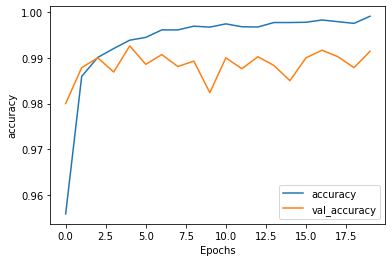

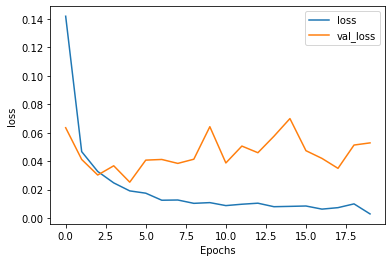

In [69]:
# graphs
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

In [73]:
generate_submission(final_cnn_model.predict(final_test_imgs_cnn),'submission_best_cnn_tunned_epochs20')

In [70]:
# save the model 
final_cnn_model.save('digit_recognistion_cnn_model.h5')

In [4]:
test_weights = keras.models.model_from_json('digit_recognistion_cnn_model')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [2]:
test_model = keras.models.load_model('digit_recognistion_cnn_model.h5')

In [3]:
test_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 80)        2080      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 80)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 112)       224112    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 112)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 48)          48432     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 48)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 432)              

In [5]:
test_model.weights

[<tf.Variable 'conv2d_12/kernel:0' shape=(5, 5, 1, 80) dtype=float32, numpy=
 array([[[[-8.29269271e-03, -7.68860355e-02, -4.48351540e-02, ...,
            1.22739315e-01, -4.57850173e-02, -2.41281744e-02]],
 
         [[-3.66648100e-02, -1.88780040e-01, -8.16567093e-02, ...,
            1.53528824e-01,  1.26229808e-01,  2.88758837e-02]],
 
         [[-2.57357329e-01, -1.64040014e-01, -1.18913641e-02, ...,
            4.02078207e-04,  1.74019456e-01,  3.53448242e-02]],
 
         [[-3.51647377e-01, -1.05668165e-01, -4.75306734e-02, ...,
           -4.04360518e-02, -4.02788371e-02, -1.96188297e-02]],
 
         [[-4.94551770e-02, -1.39956295e-01, -1.10961780e-01, ...,
            1.72592923e-02, -2.58621216e-01, -5.70272803e-02]]],
 
 
        [[[ 3.81030887e-02,  1.80857882e-01, -1.32236376e-01, ...,
            1.78314492e-01,  6.41707852e-02,  4.04161140e-02]],
 
         [[ 9.50494856e-02,  2.06288829e-01,  3.47008817e-02, ...,
           -1.97111711e-01,  8.93848613e-02, -4.9717463

#### Analysing the wrong images 


In [74]:
test_predictions = final_cnn_model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
testacc= accuracy_score(y_test,test_predictions)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [12]:
import h5py
h5py.run_tests()


Tests require pytest, pytest not installed


1